In [1]:
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Anaconda\lib\site-packages\multipledispatch\dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Identity, NoneType, Kernel, InducingPoints], [Gaussian, Linear, NoneType, Sum, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [2]:
def ou_values(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

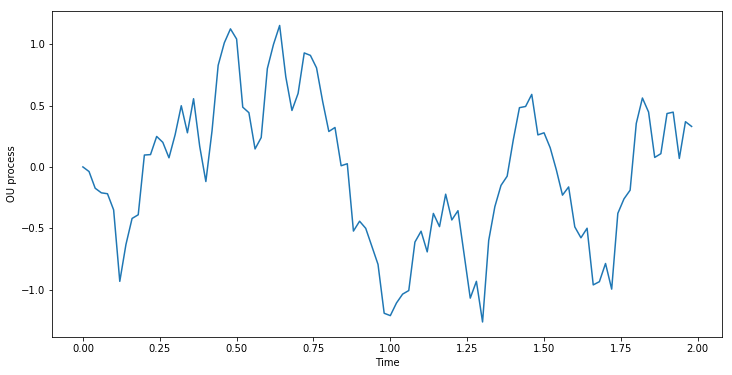

In [3]:
dt=0.02
time=np.arange(0,2,dt)# time
sigma=2
a=1# the coefficient in front, the rate
b=0# the mean
#Simulation of an OU process
x=ou_values(a,b,dt,sigma,time)# the first one is zero because param_all_r0 starts at 0
t=time# time vector
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU process')
plt.show()

In [4]:
len(time)


100

In [5]:
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [6]:
k=gpflow.kernels.Matern52(1, lengthscales=0.3)
meanf = gpflow.mean_functions.Linear(1.0, 0.0)
m = gpflow.models.GPR(t_column,x_column, k, meanf)
m.likelihood.variance = 0.1# get this to be bigger

In [7]:
m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m.compile()
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,"N([0.],[10.])",(none),True,"(1, 1)",True,[[1.0]]
GPR/mean_function/b,Parameter,"N([0.],[10.])",(none),True,(),True,0.0
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,0.3
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,0.1


In [8]:
k1=gpflow.kernels.Matern52(1, lengthscales=5,variance=5)
meanf1 = gpflow.mean_functions.Linear(5.0, 10.0)
m1 = gpflow.models.GPR(t_column,x_column, k1, meanf1)
m1.likelihood.variance = 1# get this to be bigger

In [9]:
m1.clear()
m1.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m1.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m1.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m1.compile()
m1.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,"N([0.],[10.])",(none),True,"(1, 1)",True,[[5.0]]
GPR/mean_function/b,Parameter,"N([0.],[10.])",(none),True,(),True,10.0
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,5.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,1.0


In [10]:
k2=gpflow.kernels.Matern52(1, lengthscales=20,variance=10)
meanf2 = gpflow.mean_functions.Linear(10.0, 5.0)
m2 = gpflow.models.GPR(t_column,x_column, k2, meanf2)
m2.likelihood.variance = 2# get this to be bigger

In [11]:
m2.clear()
m2.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m2.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m2.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m2.compile()
m2.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/mean_function/A,Parameter,"N([0.],[10.])",(none),True,"(1, 1)",True,[[10.0]]
GPR/mean_function/b,Parameter,"N([0.],[10.])",(none),True,(),True,5.0
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,10.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,20.0
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,2.0


In [12]:
# o sa pun 0.5 peste tot nu 0.05
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

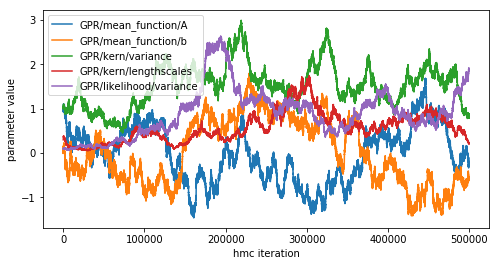

In [13]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0,0.5,'signal_variance')

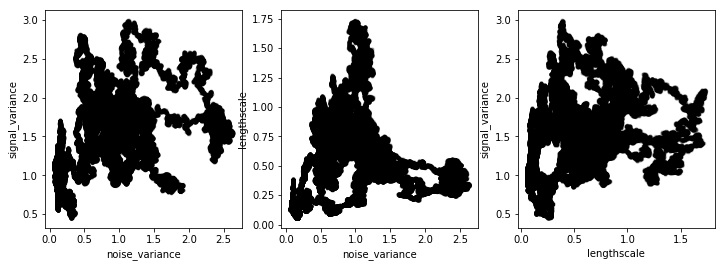

In [14]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

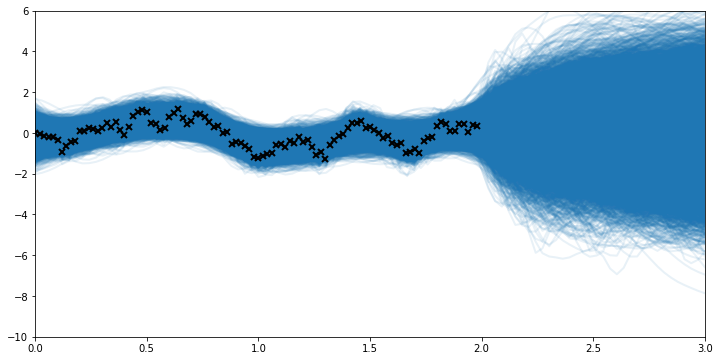

In [15]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-10, 6)

In [16]:
sampler1 = gpflow.train.HMC()
samples1 = sampler1.sample(m1, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

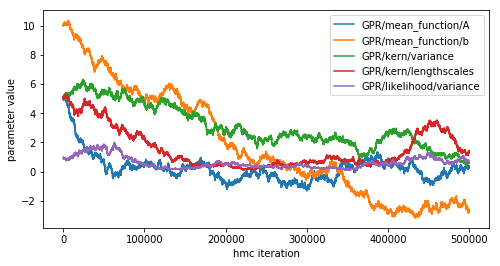

In [17]:
plt.figure(figsize=(8,4))
for i, col in samples1.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0,0.5,'signal_variance')

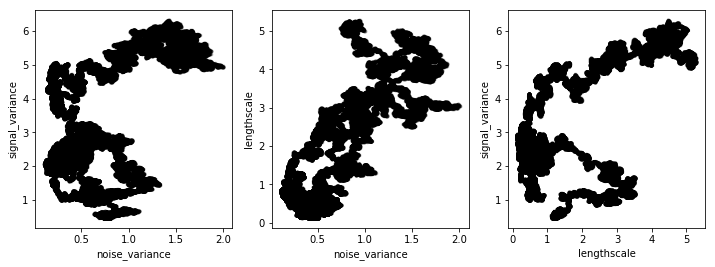

In [18]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples1['GPR/kern/lengthscales'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

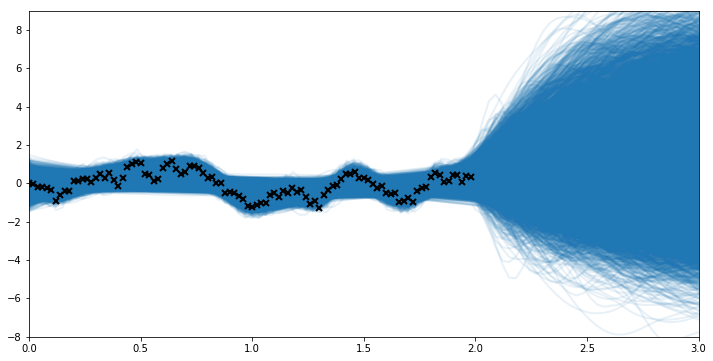

In [19]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples1.iloc[::20].iterrows():
    f = m1.predict_f_samples(xx, 1, initialize=False, feed_dict=m1.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 9)

In [20]:
sampler2 = gpflow.train.HMC()
samples2 = sampler2.sample(m2, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

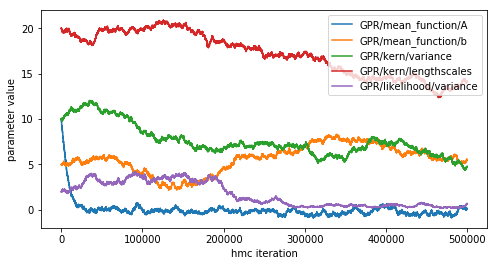

In [21]:
plt.figure(figsize=(8,4))
for i,col in samples2.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0,0.5,'signal_variance')

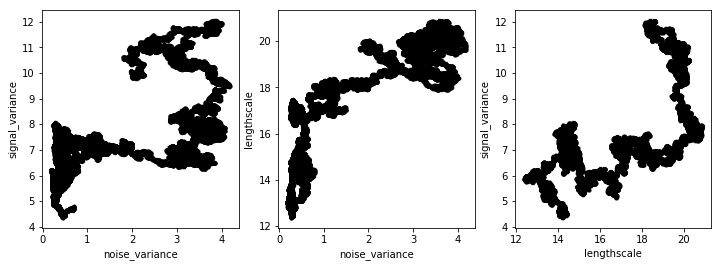

In [22]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples2['GPR/kern/lengthscales'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

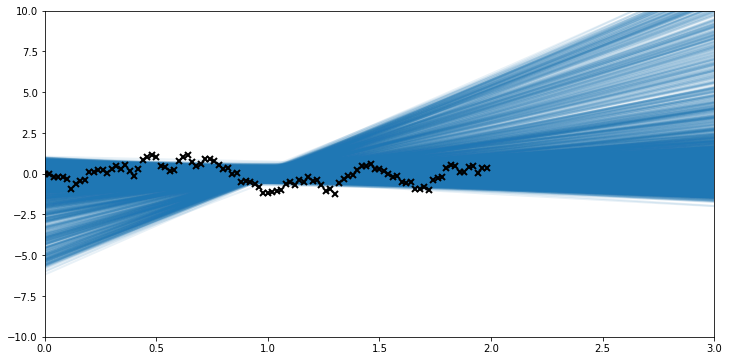

In [23]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples2.iloc[::20].iterrows():
    f = m2.predict_f_samples(xx, 1, initialize=False, feed_dict=m2.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-10, 10)

In [24]:
# Gelman-Rubin Statistic calculated for the three parameters +2 meanf parameters
#first chain
variance_vector=samples['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector=samples['GPR/kern/lengthscales'].values
likelihood_variance_vector=samples['GPR/likelihood/variance'].values
mean_A=samples['GPR/mean_function/A'].values
mean_B=samples['GPR/mean_function/b'].values


#second chain
variance_vector1=samples1['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector1=samples1['GPR/kern/lengthscales'].values
likelihood_variance_vector1=samples1['GPR/likelihood/variance'].values
mean_A1=samples1['GPR/mean_function/A'].values
mean_B1=samples1['GPR/mean_function/b'].values

# third chain
variance_vector2=samples2['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector2=samples2['GPR/kern/lengthscales'].values
likelihood_variance_vector2=samples2['GPR/likelihood/variance'].values
mean_A2=samples2['GPR/mean_function/A'].values
mean_B2=samples2['GPR/mean_function/b'].values


# create a list with all the three chains wrt each parameter in turn +2 mean parameters
l_variance=[]
l_lengthscales=[]
l_likelihood_variance=[]
l_meanA=[]
l_meanB=[]
# append the vectors
#variance_vectors
l_variance.append(variance_vector)
l_variance.append(variance_vector1)
l_variance.append(variance_vector2)
#lengthscales_vectors
l_lengthscales.append(lengthscales_vector)
l_lengthscales.append(lengthscales_vector1)
l_lengthscales.append(lengthscales_vector2)
#likelihood_variance_vectors
l_likelihood_variance.append(likelihood_variance_vector)
l_likelihood_variance.append(likelihood_variance_vector1)
l_likelihood_variance.append(likelihood_variance_vector2)
#meanA vectors
l_meanA.append(mean_A)
l_meanA.append(mean_A1)
l_meanA.append(mean_A2)
#meanB vectors
l_meanB.append(mean_B)
l_meanB.append(mean_B1)
l_meanB.append(mean_B2)

In [25]:
# x: data cell array
# m: no of chains run
# Within Chain Variance 
m=3
ssq_variance = np.zeros(m)
ssq_lengthscales=np.zeros(m)
ssq_likelihood_variance=np.zeros(m)
ssq_meanA=np.zeros(m)
ssq_meanB=np.zeros(m)

for j in range(0,m):
    ssq_variance[j]=np.var(l_variance[j])
    ssq_lengthscales[j]=np.var(l_lengthscales[j])    
    ssq_likelihood_variance[j]=np.var(l_likelihood_variance[j])    
    ssq_meanA[j]=np.var(l_meanA[j])    
    ssq_meanB[j]=np.var(l_meanB[j])    
                        
    
Wvar_variance = np.mean(ssq_variance)
Wvar_lengthscales=np.mean(ssq_lengthscales)
Wvar_likelihood_variance=np.mean(ssq_likelihood_variance)
Wvar_meanA = np.mean(ssq_meanA)
Wvar_meanB = np.mean(ssq_meanB)



In [26]:
# Between Chain Variance
schain_variance,schain_lengthscales,schain_likelihood_variance,schain_meanA,schain_meanB = 0,0,0,0,0
chainlng_variance=len(l_variance[0])
chainlng_lengthscales=len(l_lengthscales[0])
chainlng_likelihood_variance=len(l_likelihood_variance[0])
chainlng_meanA=len(l_meanA[0])
chainlng_meanB=len(l_meanB[0])

for j in range(0,m):
    schain_variance = schain_variance + np.mean(l_variance[j]) # sum of all chain means
    schain_lengthscales = schain_lengthscales + np.mean(l_lengthscales[j])
    schain_likelihood_variance = schain_likelihood_variance+np.mean(l_likelihood_variance[j])
    schain_meanA = schain_meanA + np.mean(l_meanA[j]) # sum of all chain means
    schain_meanB = schain_meanB + np.mean(l_meanB[j]) # sum of all chain means

mubar2_variance = (1/m) * schain_variance
mubar2_lengthscales = (1/m) * schain_lengthscales
mubar2_likelihood_variance = (1/m) * schain_likelihood_variance
mubar2_meanA = (1/m) * schain_meanA
mubar2_meanB = (1/m) * schain_meanB


bs_variance,bs_lengthscales,bs_likelihood_variance,bs_meanA,bs_meanB=0,0,0,0,0

for j in range(0,m):
    bs_variance=bs_variance + (np.mean(l_variance[j])-mubar2_variance)**2
    bs_lengthscales=bs_lengthscales + (np.mean(l_lengthscales[j])-mubar2_lengthscales)**2
    bs_likelihood_variance=bs_likelihood_variance + np.mean(l_likelihood_variance[j]-mubar2_likelihood_variance )**2
    bs_meanA=bs_meanA + (np.mean(l_meanA[j])-mubar2_meanA)**2
    bs_meanB=bs_variance + (np.mean(l_meanB[j])-mubar2_meanB)**2

Bvar_variance = (chainlng_variance/(m-1)) * bs_variance # all chains have the same length
Bvar_lengthscales = (chainlng_lengthscales/(m-1)) * bs_lengthscales
Bvar_likelihood_variance = (chainlng_likelihood_variance/(m-1)) * bs_likelihood_variance
Bvar_meanA = (chainlng_meanA/(m-1)) * bs_meanA # all chains have the same length
Bvar_meanB = (chainlng_meanB/(m-1)) * bs_meanB # all chains have the same length

# Estimated variance
muvar_variance = (1-1/chainlng_variance) * Wvar_variance + (1/chainlng_variance)*Bvar_variance
muvar_lengthscales = (1-1/chainlng_lengthscales) * Wvar_lengthscales+ (1/chainlng_lengthscales)*Bvar_lengthscales
muvar_likelihood_variance = (1-1/chainlng_likelihood_variance) * Wvar_likelihood_variance + (1/chainlng_likelihood_variance) * Bvar_likelihood_variance
muvar_meanA = (1-1/chainlng_meanA) * Wvar_meanA + (1/chainlng_meanA)*Bvar_meanA
muvar_meanB = (1-1/chainlng_meanB) * Wvar_meanB + (1/chainlng_meanB)*Bvar_meanB

# Potential Scale Reduction Factor
R_variance = np.sqrt(muvar_variance/Wvar_variance)
R_lengthscales = np.sqrt(muvar_lengthscales/Wvar_lengthscales) 
R_likelihood_variance = np.sqrt(muvar_likelihood_variance/Wvar_likelihood_variance) 
R_meanA = np.sqrt(muvar_meanA/Wvar_meanA)
R_meanB = np.sqrt(muvar_meanB/Wvar_meanB)

print(R_variance)
print(R_lengthscales)# smaller than 1.1, so the chain has converged.
print(R_likelihood_variance)# smaller than 1.1, so the chain has converged.
print(R_meanA)
print(R_meanB)

2.5527079987165835
5.94102909944174
1.1744532094432494
[[1.01385079]]
1.907624854486949


In [27]:
# another try without adding the meanf
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)
k=gpflow.kernels.Matern12(1, lengthscales=10)
m = gpflow.models.GPR(t_column,x_column, k)
m.likelihood.variance = 0.1
m.kern.variance=1

In [28]:
m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.compile()
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,0.1


In [29]:
k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)
m1 = gpflow.models.GPR(t_column,x_column, k1)
m1.likelihood.variance = 1# get this to be bigger

In [30]:
m1.clear()
m1.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m1.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.compile()
m1.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,5.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,1.0


In [31]:
k2=gpflow.kernels.Matern52(1, lengthscales=20,variance=10)
m2 = gpflow.models.GPR(t_column,x_column, k2)
m2.likelihood.variance = 2# get this to be bigger

In [32]:
m2.clear()
m2.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m2.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.compile()
m2.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,10.0
GPR/kern/lengthscales,Parameter,"Ga([1.],[1.])",+ve,True,(),True,20.0
GPR/likelihood/variance,Parameter,"Ga([1.],[1.])",+ve,True,(),True,2.0


In [33]:
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

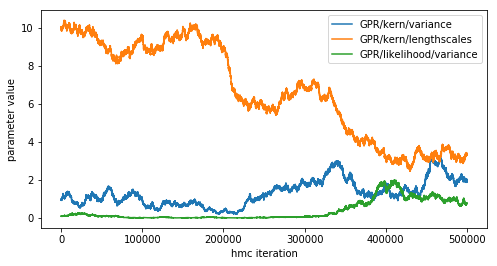

In [34]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0,0.5,'signal_variance')

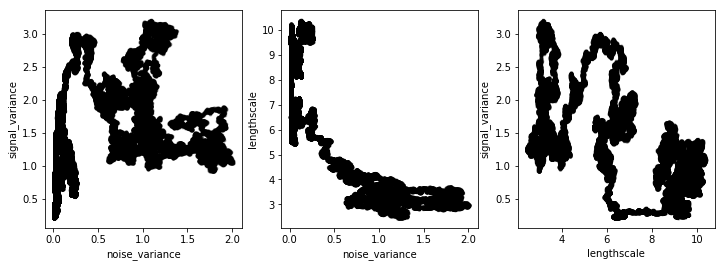

In [35]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

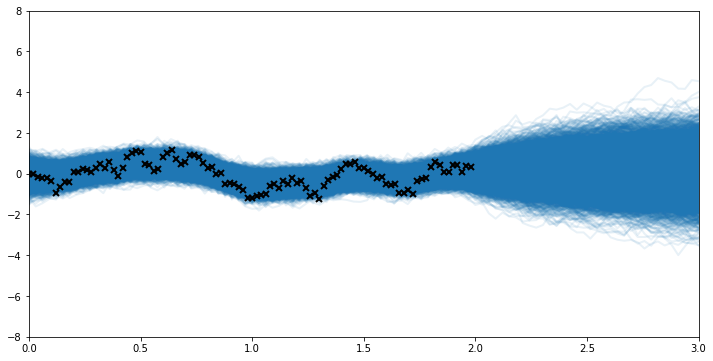

In [ ]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 8)

In [ ]:
sampler1 = gpflow.train.HMC()
samples1 = sampler1.sample(m1, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,lmin=10, lmax=20, logprobs=False)

In [ ]:
plt.figure(figsize=(8,4))
for i, col in samples1.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

In [ ]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples1['GPR/kern/lengthscales'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

In [ ]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples1.iloc[::20].iterrows():
    f = m1.predict_f_samples(xx, 1, initialize=False, feed_dict=m1.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-9, 9)

In [ ]:
sampler2 = gpflow.train.HMC()
samples2 = sampler2.sample(m2, num_samples=gpflow.test_util.notebook_niter(500000), epsilon=0.005,logprobs=False)#,era 0.005 lmin=10, lmax=20, logprobs=False)

In [ ]:
plt.figure(figsize=(8,4))
for i, col in samples2.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

In [ ]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples2['GPR/kern/lengthscales'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

In [ ]:
#plot the function posterior
xx = np.linspace(0, 3, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples2.iloc[::20].iterrows():
    f = m2.predict_f_samples(xx, 1, initialize=False, feed_dict=m2.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-9, 9)

In [ ]:
# Gelman-Rubin Statistic calculated for the three parameters
#first chain
variance_vector=samples['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector=samples['GPR/kern/lengthscales'].values
likelihood_variance_vector=samples['GPR/likelihood/variance'].values
#second chain
variance_vector1=samples1['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector1=samples1['GPR/kern/lengthscales'].values
likelihood_variance_vector1=samples1['GPR/likelihood/variance'].values
# third chain
variance_vector2=samples2['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector2=samples2['GPR/kern/lengthscales'].values
likelihood_variance_vector2=samples2['GPR/likelihood/variance'].values
# create a list with all the three chains wrt each parameter in turn
l_variance=[]
l_lengthscales=[]
l_likelihood_variance=[]
# append the vectors
#variance_vectors
l_variance.append(variance_vector)
l_variance.append(variance_vector1)
l_variance.append(variance_vector2)
#lengthscales_vectors
l_lengthscales.append(lengthscales_vector)
l_lengthscales.append(lengthscales_vector1)
l_lengthscales.append(lengthscales_vector2)
#likelihood_variance_vectors
l_likelihood_variance.append(likelihood_variance_vector)
l_likelihood_variance.append(likelihood_variance_vector1)
l_likelihood_variance.append(likelihood_variance_vector2)


In [ ]:
# x: data cell array
# m: no of chains run
# Within Chain Variance 
m=3
ssq_variance = np.zeros(m)
ssq_lengthscales=np.zeros(m)
ssq_likelihood_variance=np.zeros(m)
for j in range(0,m):
    ssq_variance[j]=np.var(l_variance[j])
for j in range(0,m):
    ssq_lengthscales[j]=np.var(l_lengthscales[j])    
for j in range(0,m):
    ssq_likelihood_variance[j]=np.var(l_likelihood_variance[j])    
        
    
Wvar_variance = np.mean(ssq_variance)
Wvar_lengthscales=np.mean(ssq_lengthscales)
Wvar_likelihood_variance=np.mean(ssq_likelihood_variance)

In [ ]:
# Between Chain Variance
schain_variance,schain_lengthscales,schain_likelihood_variance = 0,0,0
chainlng_variance=len(l_variance[0])
chainlng_lengthscales=len(l_lengthscales[0])
chainlng_likelihood_variance=len(l_likelihood_variance[0])
for j in range(0,m):
    schain_variance = schain_variance + np.mean(l_variance[j]) # sum of all chain means
    schain_lengthscales = schain_lengthscales + np.mean(l_lengthscales[j])
    schain_likelihood_variance=schain_likelihood_variance+np.mean(l_likelihood_variance[j])

mubar2_variance = (1/m)*schain_variance
mubar2_lengthscales = (1/m)*schain_lengthscales
mubar2_likelihood_variance = (1/m)*schain_likelihood_variance
bs_variance,bs_lengthscales,bs_likelihood_variance=0,0,0

for j in range(0,m):
    bs_variance=bs_variance+(np.mean(l_variance[j])-mubar2_variance)**2
    bs_lengthscales=bs_lengthscales+(np.mean(l_lengthscales[j])-mubar2_lengthscales)**2
    bs_likelihood_variance=bs_likelihood_variance+np.mean(l_likelihood_variance[j]-mubar2_likelihood_variance )**2

Bvar_variance = (chainlng_variance/(m-1))*bs_variance # all chains have the same length
Bvar_lengthscales = (chainlng_lengthscales/(m-1))*bs_lengthscales
Bvar_likelihood_variance = (chainlng_likelihood_variance/(m-1))*bs_likelihood_variance

# Estimated variance
muvar_variance = (1-1/chainlng_variance)*Wvar_variance + (1/chainlng_variance)*Bvar_variance
muvar_lengthscales = (1-1/chainlng_lengthscales)*Wvar_lengthscales+ (1/chainlng_lengthscales)*Bvar_lengthscales
muvar_likelihood_variance = (1-1/chainlng_likelihood_variance)*Wvar_likelihood_variance + (1/chainlng_likelihood_variance)*Bvar_likelihood_variance

# Potential Scale Reduction Factor
R_variance = np.sqrt(muvar_variance/Wvar_variance)
R_lengthscales = np.sqrt(muvar_lengthscales/Wvar_lengthscales) 
R_likelihood_variance = np.sqrt(muvar_likelihood_variance/Wvar_likelihood_variance) 

print(R_variance)
print(R_lengthscales)# smaller than 1.1, so the chain has converged.
print(R_likelihood_variance)# smaller than 1.1, so the chain has converged.